### Imports

In [1]:
import pandas as pd 
import utils
import chromadb

In [36]:
PATH_TO_FILES = "../data/fbref/cleaned/"
dataframes = utils.get_all_attributes(PATH_TO_FILES)

### Query similar players by one characteristic

In [37]:
df = dataframes["shooting"]

df_player_information = df[['Season', 'League', 'Team', 'Player', 'Nation', 'Pos', 'Age']]

ids = df.index.astype(str).to_list()
attributes = df.drop(columns=['Season', 'League', 'Team', 'Player', 'Nation', 'Pos', 'Age'])
attributes = attributes.fillna(0)
embeddings = attributes.values.tolist()

chroma_client = chromadb.Client()
collection = chroma_client.create_collection(
    name = "player-db-1",
    metadata={"hnsw:space": "cosine"}
)

collection.add(
    embeddings= embeddings,
    ids=ids
)

target_id = 633

target = attributes.iloc[target_id]
target_embedding = target.values.tolist()


display(df.iloc[target_id])

Season              2022-2023
League             Bundesliga
Team               RB Leipzig
Player     Christopher Nkunku
Nation                    FRA
Pos                     FW,MF
Age                      24.0
90s                      21.1
Gls                      16.0
Sh                       70.0
SoT                      25.0
SoT%                     35.7
Sh/90                    3.32
SoT/90                   1.19
G/Sh                     0.19
G/SoT                    0.52
Dist                     15.9
PK                        3.0
PKatt                     4.0
FK                        7.0
xG                       14.4
npxG                     11.3
npxG/Sh                  0.16
G-xG                      1.6
np:G-xG                   1.7
Name: 633, dtype: object

In [38]:
query_player = target_embedding

results = collection.query(
    query_embeddings=query_player,
    n_results=2000
)

query_idx = list(results.get('ids')[0])

distances = results['distances'][0] 
similarity_percentage = []
for dist in distances:
    similarity_percentage.append((1 - dist) * 100)

result_dic = {
    'id' : query_idx,
    'similarity percentage' : similarity_percentage,
    'similarity' : distances
}
result_df = pd.DataFrame.from_dict(result_dic)
result_df
result_df['id'] = result_df['id'].astype(int)
result_df = result_df.set_index('id')

merged_data = pd.merge(df, result_df, left_index=True, right_index=True, how='right')
merged_data.sort_values('similarity',ascending=True)[:20]

,Season,League,Team,Player,Nation,Pos,Age,90s,Gls,Sh,...,PK,PKatt,FK,xG,npxG,npxG/Sh,G-xG,np:G-xG,similarity percentage,similarity
id,,,,,,,,,,,,,,,,,,,,,
633,2022-2023,Bundesliga,RB Leipzig,Christopher Nkunku,FRA,"FW,MF",24.0,21.1,16.0,70.0,...,3.0,4.0,7.0,14.4,11.3,0.16,1.6,1.7,99.999994,5.960464e-08
2368,2022-2023,SeriaA,Milan,Olivier Giroud,FRA,FW,35.0,23.8,13.0,77.0,...,3.0,3.0,6.0,12.7,10.4,0.14,0.3,-0.4,99.638790,3.612101e-03
3673,2022-2023,PrimeiraLiga,Boavista,Yusupha Njie,GAM,FW,28.0,23.6,13.0,71.0,...,1.0,3.0,1.0,13.1,10.7,0.16,-0.1,1.3,99.589998,4.100025e-03
220,2022-2023,EPL,Brentford,Ivan Toney,ENG,FW,26.0,32.8,20.0,87.0,...,6.0,7.0,9.0,18.7,13.2,0.15,1.3,0.8,99.544567,4.554331e-03
2456,2022-2023,SeriaA,Juventus,Dušan Vlahović,SRB,FW,22.0,21.4,10.0,65.0,...,2.0,3.0,4.0,9.7,7.3,0.11,0.3,0.7,99.503601,4.963994e-03
3104,2022-2023,EreDivisie,Heerenveen,Sydney van Hooijdonk,NED,FW,22.0,28.9,16.0,90.0,...,1.0,1.0,7.0,14.0,13.1,0.15,2.0,1.9,99.388719,6.112814e-03
3448,2022-2023,PrimeiraLiga,Porto,Mehdi Taremi,IRN,FW,30.0,29.0,22.0,88.0,...,7.0,8.0,3.0,20.1,13.8,0.16,1.9,1.2,99.379450,6.205499e-03
2919,2022-2023,EreDivisie,PSV Eindhoven,Xavi Simons,NED,"FW,MF",19.0,31.1,19.0,91.0,...,2.0,2.0,0.0,14.9,13.3,0.15,4.1,3.7,99.268800,7.312000e-03
2095,2022-2023,Ligue1,Strasbourg,Habib Diallo,SEN,FW,27.0,32.0,20.0,90.0,...,3.0,4.0,1.0,17.8,14.5,0.17,2.2,2.5,99.266559,7.334411e-03


In [39]:
merged_data[merged_data["Age"] == 18][:10]

,Season,League,Team,Player,Nation,Pos,Age,90s,Gls,Sh,...,PK,PKatt,FK,xG,npxG,npxG/Sh,G-xG,np:G-xG,similarity percentage,similarity
id,,,,,,,,,,,,,,,,,,,,,
1859,2022-2023,Ligue1,Lyon,Rayan Cherki,FRA,"MF,FW",18.0,20.8,4.0,61.0,...,0.0,0.0,3.0,4.9,4.9,0.08,-0.9,-0.9,97.889805,0.021102
3159,2022-2023,EreDivisie,Vitesse,Kacper Kozłowski,POL,"MF,FW",18.0,23.2,2.0,38.0,...,0.0,0.0,0.0,3.0,3.0,0.08,-1.0,-1.0,90.483314,0.095167
147,2022-2023,EPL,Brighton,Julio César Enciso,PAR,"FW,MF",18.0,9.0,4.0,38.0,...,0.0,0.0,0.0,4.0,4.0,0.11,0.0,0.0,89.937866,0.100621
3520,2022-2023,PrimeiraLiga,Sporting CP,Youssef Chermiti,POR,FW,18.0,9.4,3.0,28.0,...,0.0,1.0,0.0,5.8,5.1,0.18,-2.8,-2.1,87.024337,0.129757
2462,2022-2023,SeriaA,Juventus,Fabio Miretti,ITA,"MF,FW",18.0,13.7,0.0,20.0,...,0.0,0.0,0.0,2.4,2.4,0.12,-2.4,-2.4,85.201442,0.147986
70,2022-2023,EPL,Manchester Utd,Alejandro Garnacho,ARG,"FW,MF",18.0,6.3,3.0,24.0,...,0.0,0.0,0.0,3.0,3.0,0.13,0.0,0.0,84.989399,0.150106
3647,2022-2023,PrimeiraLiga,Famalicão,Pablo,BRA,FW,18.0,7.9,2.0,15.0,...,0.0,0.0,0.0,1.8,1.8,0.12,0.2,0.2,84.507668,0.154923
3167,2022-2023,EreDivisie,Vitesse,Mohamed Sankoh,NED,FW,18.0,8.5,2.0,20.0,...,0.0,0.0,0.0,4.1,4.1,0.20,-2.1,-2.1,83.773315,0.162267
518,2022-2023,EPL,Leeds United,Degnand Gnonto,ITA,"FW,MF",18.0,15.0,2.0,22.0,...,0.0,0.0,0.0,1.8,1.8,0.08,0.2,0.2,83.650863,0.163491


### Query similar players by two characteristic

In [5]:
df1 = dataframes["shooting"]
df2 = dataframes["possession"]

df = pd.merge(df1, df2, on=['Player', 'Season', 'League', 'Team', 'Nation', 'Pos', 'Age', '90s'])

df_player_information = df[['Season', 'League', 'Team', 'Player', 'Nation', 'Pos', 'Age']]

ids = df.index.astype(str).to_list()
attributes = df.drop(columns=['Season', 'League', 'Team', 'Player', 'Nation', 'Pos', 'Age'])
attributes = attributes.fillna(0)
embeddings = attributes.values.tolist()

chroma_client = chromadb.Client()
collection = chroma_client.create_collection(
    name = "player-db-2",
    metadata={"hnsw:space": "cosine"}
)

collection.add(
    embeddings= embeddings,
    ids=ids
)

target_id = 633

target = attributes.iloc[target_id]
target_embedding = target.values.tolist()


display(df.iloc[target_id])

Season                      2022-2023
League                     Bundesliga
Team                       RB Leipzig
Player             Christopher Nkunku
Nation                            FRA
Pos                             FW,MF
Age                              24.0
90s                              21.1
Gls                              16.0
Sh                               70.0
SoT                              25.0
SoT%                             35.7
Sh/90                            3.32
SoT/90                           1.19
G/Sh                             0.19
G/SoT                            0.52
Dist                             15.9
PK                                3.0
PKatt                             4.0
FK                                7.0
xG                               14.4
npxG                             11.3
npxG/Sh                          0.16
G-xG                              1.6
np:G-xG                           1.7
Touches_Touches                 854.0
Touches_Def 

In [6]:
query_player = target_embedding

results = collection.query(
    query_embeddings=query_player,
    n_results=200
)

query_idx = list(results.get('ids')[0])

distances = results['distances'][0] 
similarity_percentage = []
for dist in distances:
    similarity_percentage.append((1 - dist) * 100)

result_dic = {
    'id' : query_idx,
    'similarity percentage' : similarity_percentage,
    'similarity' : distances
}
result_df = pd.DataFrame.from_dict(result_dic)
result_df
result_df['id'] = result_df['id'].astype(int)
result_df = result_df.set_index('id')

merged_data = pd.merge(df, result_df, left_index=True, right_index=True, how='right')
merged_data.sort_values('similarity',ascending=True)[:20]

,Season,League,Team,Player,Nation,Pos,Age,90s,Gls,Sh,...,Carries_PrgDist,Carries_PrgC,Carries_1/3,Carries_CPA,Carries_Mis,Carries_Dis,Receiving_Rec,Receiving_PrgR,similarity percentage,similarity
id,,,,,,,,,,,,,,,,,,,,,
633,2022-2023,Bundesliga,RB Leipzig,Christopher Nkunku,FRA,"FW,MF",24.0,21.1,16.0,70.0,...,1225.0,43.0,23.0,23.0,45.0,38.0,672.0,176.0,100.000000,0.000000
634,2022-2023,Bundesliga,RB Leipzig,André Silva,POR,FW,26.0,19.3,4.0,60.0,...,984.0,35.0,21.0,23.0,65.0,43.0,556.0,142.0,99.968803,0.000312
15,2022-2023,EPL,Manchester City,Julián Álvarez,ARG,"FW,MF",22.0,16.3,9.0,46.0,...,908.0,38.0,18.0,17.0,28.0,24.0,506.0,99.0,99.964392,0.000356
2633,2022-2023,SeriaA,Sassuolo,Domenico Berardi,ITA,FW,27.0,20.7,12.0,75.0,...,1586.0,57.0,29.0,31.0,60.0,23.0,905.0,213.0,99.953943,0.000461
1380,2022-2023,LaLiga,Rayo Vallecano,Sergio Camello,ESP,FW,21.0,26.7,6.0,76.0,...,1053.0,40.0,36.0,17.0,71.0,35.0,561.0,122.0,99.945623,0.000544
186,2022-2023,EPL,Tottenham,Harry Kane,ENG,FW,29.0,37.8,30.0,124.0,...,1842.0,60.0,50.0,21.0,74.0,58.0,1031.0,193.0,99.938196,0.000618
34,2022-2023,EPL,Arsenal,Gabriel Jesus,BRA,FW,25.0,22.9,11.0,76.0,...,1517.0,44.0,31.0,28.0,88.0,65.0,799.0,194.0,99.936557,0.000634
3857,2022-2023,PrimeiraLiga,Portimonense,Welinton Júnior,BRA,FW,29.0,22.9,6.0,93.0,...,1022.0,40.0,30.0,13.0,93.0,40.0,558.0,153.0,99.932992,0.000670
491,2022-2023,EPL,Leicester City,Kelechi Iheanacho,NGA,"FW,MF",25.0,12.5,5.0,38.0,...,724.0,33.0,13.0,18.0,41.0,36.0,380.0,99.0,99.931538,0.000685


In [7]:
shooting = dataframes["shooting"]
possession = dataframes["possession"]
g_s_creation = dataframes["goal_and_shot_creation"]

s_p_merge = pd.merge(shooting, possession, on=['Player', 'Season', 'League', 'Team', 'Nation', 'Pos', 'Age', '90s'])
df = pd.merge(s_p_merge, g_s_creation, on=['Player', 'Season', 'League', 'Team', 'Nation', 'Pos', 'Age', '90s'])

len(df.columns), len(shooting.columns), len(possession.columns), len(g_s_creation.columns)

(63, 25, 30, 24)

### Query similar players by three characteristic

In [8]:
from sklearn.preprocessing import RobustScaler, StandardScaler
shooting = dataframes["shooting"]
possession = dataframes["possession"]
g_s_creation = dataframes["goal_and_shot_creation"]

s_p_merge = pd.merge(shooting, possession, on=['Player', 'Season', 'League', 'Team', 'Nation', 'Pos', 'Age', '90s'])
df = pd.merge(s_p_merge, g_s_creation, on=['Player', 'Season', 'League', 'Team', 'Nation', 'Pos', 'Age', '90s'])

df_player_information = df[['Season', 'League', 'Team', 'Player', 'Nation', 'Pos', 'Age']]

ids = df.index.astype(str).to_list()
attributes = df.drop(columns=['Season', 'League', 'Team', 'Player', 'Nation', 'Pos', 'Age'])
attributes = attributes.fillna(0)

embeddings = attributes.values.tolist()

#scaler = StandardScaler()
#scaled_data  = scaler.fit_transform(attributes)
#attributes = pd.DataFrame(scaled_data, columns=attributes.columns)
#embeddings = attributes.values.tolist()

chroma_client = chromadb.Client()
collection = chroma_client.create_collection(
    name = "player-db-3",
    metadata={"hnsw:space": "cosine"}
)

collection.add(
    embeddings= embeddings,
    ids=ids
)

target_id = 633

target = attributes.iloc[target_id]
target_embedding = target.values.tolist()


display(df.iloc[target_id])

Season                         2022-2023
League                        Bundesliga
Team                          RB Leipzig
Player                Christopher Nkunku
Nation                               FRA
                             ...        
GCA Types_PassDead                   0.0
GCA Types_TO                         3.0
GCA Types_Sh                         1.0
GCA Types_Fld                        3.0
GCA Types_Def                        0.0
Name: 633, Length: 63, dtype: object

In [9]:
query_player = target_embedding

results = collection.query(
    query_embeddings=query_player,
    n_results=200
)

query_idx = list(results.get('ids')[0])

distances = results['distances'][0] 
similarity_percentage = []
for dist in distances:
    similarity_percentage.append((1 - dist) * 100)

result_dic = {
    'id' : query_idx,
    'similarity percentage' : similarity_percentage,
    'similarity' : distances
}
result_df = pd.DataFrame.from_dict(result_dic)
result_df
result_df['id'] = result_df['id'].astype(int)
result_df = result_df.set_index('id')

merged_data = pd.merge(df, result_df, left_index=True, right_index=True, how='right')
merged_data.sort_values('similarity',ascending=True)[:20]

,Season,League,Team,Player,Nation,Pos,Age,90s,Gls,Sh,...,GCA_GCA,GCA_GCA90,GCA Types_PassLive,GCA Types_PassDead,GCA Types_TO,GCA Types_Sh,GCA Types_Fld,GCA Types_Def,similarity percentage,similarity
id,,,,,,,,,,,,,,,,,,,,,
633,2022-2023,Bundesliga,RB Leipzig,Christopher Nkunku,FRA,"FW,MF",24.0,21.1,16.0,70.0,...,14.0,0.66,7.0,0.0,3.0,1.0,3.0,0.0,100.000000,0.000000
634,2022-2023,Bundesliga,RB Leipzig,André Silva,POR,FW,26.0,19.3,4.0,60.0,...,10.0,0.52,7.0,0.0,0.0,3.0,0.0,0.0,99.966323,0.000337
15,2022-2023,EPL,Manchester City,Julián Álvarez,ARG,"FW,MF",22.0,16.3,9.0,46.0,...,5.0,0.31,2.0,0.0,1.0,1.0,1.0,0.0,99.960172,0.000398
2633,2022-2023,SeriaA,Sassuolo,Domenico Berardi,ITA,FW,27.0,20.7,12.0,75.0,...,17.0,0.82,10.0,1.0,1.0,3.0,2.0,0.0,99.951822,0.000482
1380,2022-2023,LaLiga,Rayo Vallecano,Sergio Camello,ESP,FW,21.0,26.7,6.0,76.0,...,7.0,0.26,5.0,0.0,1.0,1.0,0.0,0.0,99.941456,0.000585
186,2022-2023,EPL,Tottenham,Harry Kane,ENG,FW,29.0,37.8,30.0,124.0,...,18.0,0.48,10.0,0.0,2.0,3.0,3.0,0.0,99.937212,0.000628
34,2022-2023,EPL,Arsenal,Gabriel Jesus,BRA,FW,25.0,22.9,11.0,76.0,...,12.0,0.52,8.0,0.0,1.0,1.0,2.0,0.0,99.930346,0.000697
491,2022-2023,EPL,Leicester City,Kelechi Iheanacho,NGA,"FW,MF",25.0,12.5,5.0,38.0,...,6.0,0.48,6.0,0.0,0.0,0.0,0.0,0.0,99.929684,0.000703
3857,2022-2023,PrimeiraLiga,Portimonense,Welinton Júnior,BRA,FW,29.0,22.9,6.0,93.0,...,4.0,0.17,2.0,0.0,0.0,1.0,1.0,0.0,99.923313,0.000767


### Top 10 most similar players to Nkunku that are under 23 

In [10]:
merged_data[merged_data["Age"] < 23][:10]

,Season,League,Team,Player,Nation,Pos,Age,90s,Gls,Sh,...,GCA_GCA,GCA_GCA90,GCA Types_PassLive,GCA Types_PassDead,GCA Types_TO,GCA Types_Sh,GCA Types_Fld,GCA Types_Def,similarity percentage,similarity
id,,,,,,,,,,,,,,,,,,,,,
15,2022-2023,EPL,Manchester City,Julián Álvarez,ARG,"FW,MF",22.0,16.3,9.0,46.0,...,5.0,0.31,2.0,0.0,1.0,1.0,1.0,0.0,99.960172,0.000398
1380,2022-2023,LaLiga,Rayo Vallecano,Sergio Camello,ESP,FW,21.0,26.7,6.0,76.0,...,7.0,0.26,5.0,0.0,1.0,1.0,0.0,0.0,99.941456,0.000585
1099,2022-2023,LaLiga,Barcelona,Ferrán Torres,ESP,"FW,MF",22.0,15.5,4.0,37.0,...,3.0,0.19,3.0,0.0,0.0,0.0,0.0,0.0,99.895871,0.001041
508,2022-2023,EPL,Leeds United,Brenden Aaronson,USA,"MF,FW",21.0,26.4,1.0,41.0,...,7.0,0.27,3.0,1.0,0.0,1.0,1.0,1.0,99.884754,0.001152
12,2022-2023,EPL,Manchester City,Phil Foden,ENG,FW,22.0,20.5,11.0,46.0,...,14.0,0.68,10.0,0.0,3.0,0.0,1.0,0.0,99.855256,0.001447
219,2022-2023,EPL,Brentford,Bryan Mbeumo,CMR,FW,22.0,32.3,9.0,70.0,...,15.0,0.46,12.0,2.0,1.0,0.0,0.0,0.0,99.854386,0.001456
3116,2022-2023,EreDivisie,Heerenveen,Rami Al Hajj,SWE,"MF,FW",20.0,7.6,0.0,20.0,...,3.0,0.39,2.0,1.0,0.0,0.0,0.0,0.0,99.851727,0.001483
2664,2022-2023,SeriaA,Empoli,Martin Satriano,URU,FW,21.0,18.9,2.0,38.0,...,3.0,0.16,2.0,0.0,0.0,1.0,0.0,0.0,99.838215,0.001618
1198,2022-2023,LaLiga,Villarreal,Yeremi Pino,ESP,"FW,MF",19.0,27.2,4.0,50.0,...,9.0,0.33,7.0,0.0,0.0,2.0,0.0,0.0,99.835348,0.001647


### Dimensionality Reduction: Query by shooting statistics

#### Scale data

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = dataframes["shooting"]

df_player_information = df[['Season', 'League', 'Team', 'Player', 'Nation', 'Pos', 'Age']]

ids = df.index.astype(str).to_list()
attributes = df.drop(columns=['Season', 'League', 'Team', 'Player', 'Nation', 'Pos', 'Age'])
attributes = attributes.fillna(0)

scaler = StandardScaler()
attributes_scaled = scaler.fit_transform(attributes)

#### Inspect variance by number of components

Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

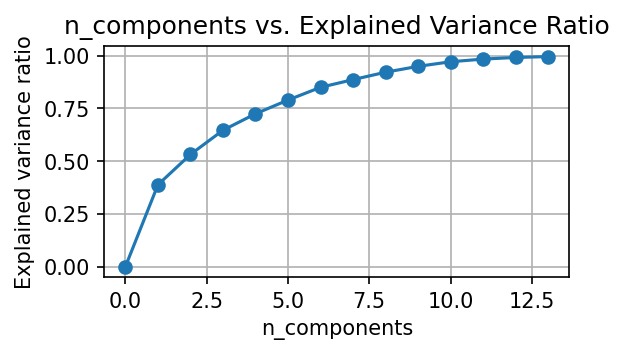

In [4]:
import matplotlib.pyplot as plt
import numpy as np
nums = np.arange(14)
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(attributes_scaled)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))


plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

#### Create Vector Database

In [19]:
chroma_client = chromadb.Client()
collection = chroma_client.create_collection(
    name = "player-db-pca-3",
    metadata={"hnsw:space": "cosine"}
)


#### Construct components and add to VDB

In [20]:
pca = PCA(n_components=6)
embeddings_arr = pca.fit_transform(attributes_scaled)
embeddings = embeddings_arr.tolist()

collection.add(
    embeddings= embeddings,
    ids=ids
)

#### Showcase query player

In [21]:
target_id = 633

target = embeddings_arr[target_id,:]
target_embedding = target.tolist()

display(df.iloc[target_id])

Season              2022-2023
League             Bundesliga
Team               RB Leipzig
Player     Christopher Nkunku
Nation                    FRA
Pos                     FW,MF
Age                      24.0
90s                      21.1
Gls                      16.0
Sh                       70.0
SoT                      25.0
SoT%                     35.7
Sh/90                    3.32
SoT/90                   1.19
G/Sh                     0.19
G/SoT                    0.52
Dist                     15.9
PK                        3.0
PKatt                     4.0
FK                        7.0
xG                       14.4
npxG                     11.3
npxG/Sh                  0.16
G-xG                      1.6
np:G-xG                   1.7
Name: 633, dtype: object

#### Query and inspect results

In [34]:
query_player = target_embedding

results = collection.query(
    query_embeddings=query_player,
    n_results=1000
)

query_idx = list(results.get('ids')[0])

distances = results['distances'][0] 
similarity_percentage = []
for dist in distances:
    similarity_percentage.append((1 - dist) * 100)

result_dic = {
    'id' : query_idx,
    'similarity percentage' : similarity_percentage,
    'similarity' : distances
}
result_df = pd.DataFrame.from_dict(result_dic)
result_df
result_df['id'] = result_df['id'].astype(int)
result_df = result_df.set_index('id')

merged_data = pd.merge(df, result_df, left_index=True, right_index=True, how='right')
merged_data.sort_values('similarity',ascending=True)[:20]

,Season,League,Team,Player,Nation,Pos,Age,90s,Gls,Sh,...,PK,PKatt,FK,xG,npxG,npxG/Sh,G-xG,np:G-xG,similarity percentage,similarity
id,,,,,,,,,,,,,,,,,,,,,
633,2022-2023,Bundesliga,RB Leipzig,Christopher Nkunku,FRA,"FW,MF",24.0,21.1,16.0,70.0,...,3.0,4.0,7.0,14.4,11.3,0.16,1.6,1.7,100.000012,-1.192093e-07
1851,2022-2023,Ligue1,Lyon,Alexandre Lacazette,FRA,FW,31.0,32.5,27.0,107.0,...,6.0,8.0,8.0,24.2,17.9,0.17,2.8,3.1,99.430823,5.691767e-03
2456,2022-2023,SeriaA,Juventus,Dušan Vlahović,SRB,FW,22.0,21.4,10.0,65.0,...,2.0,3.0,4.0,9.7,7.3,0.11,0.3,0.7,99.405891,5.941093e-03
1738,2022-2023,Ligue1,Marseille,Alexis Sánchez,CHI,"FW,MF",33.0,29.8,14.0,63.0,...,2.0,3.0,5.0,12.6,10.2,0.17,1.4,1.8,98.714834,1.285166e-02
1828,2022-2023,Ligue1,Monaco,Wissam Ben Yedder,FRA,FW,31.0,23.5,19.0,66.0,...,5.0,6.0,3.0,17.4,12.7,0.19,1.6,1.3,98.329049,1.670951e-02
1616,2022-2023,LaLiga,Espanyol,Joselu,ESP,FW,32.0,33.2,16.0,87.0,...,5.0,5.0,2.0,14.5,10.5,0.12,1.5,0.5,98.217291,1.782709e-02
1263,2022-2023,LaLiga,Osasuna,Ezequiel Ávila,ARG,"FW,MF",28.0,19.0,8.0,64.0,...,2.0,3.0,2.0,6.7,4.4,0.07,1.3,1.6,98.104864,1.895136e-02
2751,2022-2023,SeriaA,Spezia,M'Bala Nzola,ANG,FW,25.0,29.5,13.0,60.0,...,3.0,3.0,0.0,11.0,8.6,0.14,2.0,1.4,98.056960,1.943040e-02
907,2022-2023,Bundesliga,Werder Bremen,Niclas Füllkrug,GER,FW,29.0,27.5,16.0,74.0,...,5.0,5.0,0.0,12.8,8.6,0.12,3.2,2.4,98.049343,1.950657e-02


In [35]:
merged_data[merged_data["Age"] == 18][:10]

,Season,League,Team,Player,Nation,Pos,Age,90s,Gls,Sh,...,PK,PKatt,FK,xG,npxG,npxG/Sh,G-xG,np:G-xG,similarity percentage,similarity
id,,,,,,,,,,,,,,,,,,,,,
1859,2022-2023,Ligue1,Lyon,Rayan Cherki,FRA,"MF,FW",18.0,20.8,4.0,61.0,...,0.0,0.0,3.0,4.9,4.9,0.08,-0.9,-0.9,60.893416,0.391066
147,2022-2023,EPL,Brighton,Julio César Enciso,PAR,"FW,MF",18.0,9.0,4.0,38.0,...,0.0,0.0,0.0,4.0,4.0,0.11,0.0,0.0,50.367314,0.496327
2984,2022-2023,EreDivisie,AZ Alkmaar,Milos Kerkez,HUN,DF,18.0,29.7,3.0,25.0,...,0.0,0.0,0.0,2.3,2.3,0.09,0.7,0.7,39.693594,0.603064
70,2022-2023,EPL,Manchester Utd,Alejandro Garnacho,ARG,"FW,MF",18.0,6.3,3.0,24.0,...,0.0,0.0,0.0,3.0,3.0,0.13,0.0,0.0,36.614376,0.633856
2103,2022-2023,Ligue1,Strasbourg,Mouhamadou Diarra,FRA,"MF,FW",18.0,18.1,3.0,23.0,...,0.0,0.0,0.0,1.8,1.8,0.08,1.2,1.2,36.587185,0.634128
3520,2022-2023,PrimeiraLiga,Sporting CP,Youssef Chermiti,POR,FW,18.0,9.4,3.0,28.0,...,0.0,1.0,0.0,5.8,5.1,0.18,-2.8,-2.1,34.651464,0.653485
3159,2022-2023,EreDivisie,Vitesse,Kacper Kozłowski,POL,"MF,FW",18.0,23.2,2.0,38.0,...,0.0,0.0,0.0,3.0,3.0,0.08,-1.0,-1.0,34.400737,0.655993
3163,2022-2023,EreDivisie,Vitesse,Gabriel Vidovic,CRO,"FW,MF",18.0,13.5,4.0,22.0,...,0.0,0.0,0.0,1.4,1.4,0.07,2.6,2.6,32.589465,0.674105
518,2022-2023,EPL,Leeds United,Degnand Gnonto,ITA,"FW,MF",18.0,15.0,2.0,22.0,...,0.0,0.0,0.0,1.8,1.8,0.08,0.2,0.2,27.694416,0.723056


#### Conclusion

- It is possible to reduce the dimension and maintain relevant results (`n_components = 5`)
- It also presents some unanticipated players
- The percentage of similarity has is now more differentiated